**Family Wize Error Rate - Análise do Erro Tipo I nas 98 maiores ETF´s americanas: Vale a pena a arbitragem aos pares?**

# 1) Storytelling

O Family Wize Error Rate é um teste de múltiplas hipóteses, cuja probabilidade do Erro Tipo I (falsos positivos) aumenta à medida que mais hipóteses e comparações são realizadas.

E se pudéssemos explorar a tendência da reversão à média num possível trade aos pares entre 98 ETF´s americanos?

Portanto, num primeiro momento devemos testar a hipótese nula da não reversão à média entre esses 98 fundos. Um teste T evidenciou a reversão para 12 desses fundos.
Posterieomente, as correções pelos métodos de Bonferroni e Holm reduziram o escopo a somente os fundos BIL, JPST, SGOV e SHV (ou seja, rejeitar H0 e aceitar H1 = há relevância significativa entre as médias...).

Todavia, esses 4 fundos ocupavam as posições 74 a 77 numa ordem crescente de retorno médio. São retornos baixos e portanto não significativos.

Alternativamente, decidimos testar a hipótese de diferença significativa de performance entre os fundos de maior (TQQQ) e menor (TLT) médias entre os 98. Novamente, o teste apresentou não significância ( ou seja pvalor > 0.05).

Por fim, utilizamos o teste de paridade de Tukey nesses 6 fundos (maior média = TQQQ, XLE, SMH e menor média = TLT, IEF, GOVT).

Todos os pvalores de correção ajustados aos pares indicaram aceitar a hipótese nula, trazendo mais evidência da não significância estatística para possível exploração das médias dos fundos para  arbitragem e pairs trading.





 # 2) Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy.stats import \
    (ttest_1samp,
     ttest_rel,
     ttest_ind,
     t as t_dbn)
from statsmodels.stats.multicomp import \
     pairwise_tukeyhsd
from statsmodels.stats.multitest import \
     multipletests as mult_test

# 3) Web scrapping and Cleaning Data

In [ ]:
# Top 100 ETF em valor de mercado

# Fonte: https://etfdb.com/compare/market-cap/

# Ordenar alfabeticamente e visualizar como lista
# tickers.sort()
# print(tickers, end='')

tickers = ['ACWI', 'AGG', 'BIL', 'BIV', 'BND', 'BNDX', 'BSV', 'COWZ', 'CSHX', 'DGRO', 'DIA', 'DVY', 'EFA', 'EFV', 'GLD', 'GOVT',
           'IAU', 'IEF', 'IEFA', 'IEMG', 'IGSB', 'IJH', 'IJR', 'ITOT', 'IUSB', 'IUSG', 'IUSV', 'IVE', 'IVV', 'IVW', 'IWB', 'IWD',
           'IWF', 'IWM', 'IWR', 'IXUS', 'IYW', 'JEPI', 'JPST', 'LQD', 'MBB', 'MDY', 'MGK', 'MUB', 'QQQ', 'QQQM', 'QUAL', 'RSP',
           'SCHB', 'SCHD', 'SCHF', 'SCHG', 'SDY', 'SGOV', 'SHV', 'SHY', 'SMH', 'SPDW', 'SPLG', 'SPY', 'SPYG', 'SPYV', 'TLT',
           'TQQQ', 'USHY', 'USMV', 'VB', 'VBR', 'VCIT', 'VCSH', 'VEA', 'VEU', 'VGIT', 'VGK', 'VGSH', 'VGT', 'VIG', 'VNQ', 'VO',
           'VONG', 'VOO', 'VT', 'VTEB', 'VTI', 'VTV', 'VUG', 'VV', 'VWO', 'VXF', 'VXUS', 'VYM', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK',
           'XLV', 'XLY']
len(tickers)

98

In [ ]:
# Download da cotação

cotacao = yf.download(tickers, start='2021-01-01', actions=True)['Adj Close']
cotacao.head()

[*********************100%***********************]  98 of 98 completed


Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,DIA,DVY,EFA,EFV,GLD,GOVT,IAU,IEF,IEFA,IEMG,IGSB,IJH,IJR,ITOT,IUSB,IUSG,IUSV,IVE,IVV,IVW,IWB,IWD,IWF,IWM,IWR,IXUS,IYW,JEPI,JPST,LQD,MBB,MDY,MGK,MUB,QQQ,QQQM,QUAL,RSP,SCHB,SCHD,SCHF,SCHG,SDY,SGOV,SHV,SHY,SMH,SPDW,SPLG,SPY,SPYG,SPYV,TLT,TQQQ,USHY,USMV,VB,VBR,VCIT,VCSH,VEA,VEU,VGIT,VGK,VGSH,VGT,VIG,VNQ,VO,VONG,VOO,VT,VTEB,VTI,VTV,VUG,VV,VWO,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,84.757004,106.831581,82.721519,82.669304,79.365250,52.343597,76.613182,31.156063,46.690117,40.493149,282.048676,82.886993,65.917191,40.664284,182.330002,25.355980,37.099998,110.513069,62.297382,56.951195,49.973003,42.866970,86.140877,80.638542,48.994003,84.589218,56.723240,117.368462,350.382263,61.132915,198.668106,125.292755,231.764694,184.557434,64.062202,61.089569,82.608658,40.030956,45.360001,120.839027,100.034889,396.094299,196.873795,107.236351,302.171967,123.995163,108.826653,118.159065,13.233930,16.056238,15.294755,15.166080,95.251183,90.241257,100.060104,80.177498,106.978615,30.470886,40.991379,349.471649,52.683941,31.292185,142.224869,42.065182,32.755817,62.925564,181.250748,129.522964,85.327400,75.434883,42.448128,52.468712,63.609871,54.070850,56.739868,338.166534,129.757080,71.616821,192.024445,59.428082,320.475098,85.371841,50.488411,181.573761,107.044060,244.203888,164.203201,45.151123,155.058029,54.149902,80.654091,64.224014,32.745716,27.158768,81.555206,123.971809,106.592911,154.748489
2021-01-05 00:00:00+00:00,85.630699,106.722984,82.712494,82.553558,79.230103,52.289951,76.576202,31.549850,47.045113,40.713066,283.466736,83.840416,66.600273,41.067398,182.869995,25.300417,37.180000,110.255127,62.996647,58.180561,49.945835,43.488289,87.976471,81.244858,48.967022,85.140572,57.176804,118.195412,352.700989,61.570488,200.227859,126.370216,232.973495,187.409241,64.736572,61.930256,83.278831,40.081783,45.360001,120.452118,100.089371,401.949371,197.912842,107.327888,304.663025,124.985519,109.264381,119.164864,13.341545,16.185741,15.455042,15.261823,95.944115,90.241257,100.060104,80.177498,108.850723,30.838869,41.274998,351.878601,53.002941,31.522818,141.168686,43.120144,32.787670,62.991383,183.843674,131.735840,85.169098,75.398605,42.930893,53.273869,63.527473,54.558212,56.730682,340.946411,130.176361,71.721420,193.852875,59.741592,322.583069,86.308563,50.497574,183.040573,107.846153,245.788483,165.330139,46.200520,157.342133,54.937275,81.341072,64.455864,34.212200,27.280178,82.357475,124.776268,107.366753,155.903641
2021-01-06 00:00:00+00:00,86.109810,106.198059,82.721519,82.188438,78.878609,52.218437,76.502243,32.562447,48.367451,41.464462,287.543762,87.155556,67.364235,42.096664,179.899994,25.152243,36.599998,109.610390,63.767635,57.752556,49.900551,45.223427,92.253242,81.983795,48.787197,84.560188,58.565273,120.899193,354.830414,60.957893,201.521317,129.537613,230.380386,195.077682,66.047218,62.309910,81.711792,40.306835,45.351086,119.476128,100.043999,417.866302,195.472031,107.218040,300.442780,123.263367,109.768730,122.013100,13.449163,16.632664,15.619546,15.087090,99.126152,90.236763,100.069160,80.131111,108.518333,31.144026,41.501888,353.982269,52.548607,32.270069,138.270676,41.336880,32.708065,63.564884,189.767746,137.356049,84.887665,75.326141,43.395794,53.560135,63.325977,55.205078,56.712261,335.289398,131.816101,71.843437,197.076233,59.019791,324.539764,86.920670,50.506710,184.687180,110.443863,243.098572,166.021469,45.761028,160.734772,55.232548,83.384193,64.146736,35.255989,28.484951,84.320602,122.624481,108.838966,157.495575
2021-01-07 00:00:00+00:00,87.011688,106.089485,82.721519,82.081573,78.716393,52.227386,76.493019,32.834347,48.189949,41.776028,289.680267,87.426712,67.436150,42.302505,179.479996,25.087418,36.480000,109.223526,63.767635,58.207874,49.900551,45.700775,93.227814,83.234283,48.706280,86.369034,59.009571,121.846901,360.082947,62.328938,204.

In [ ]:
# Dados da cotação

cotacao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 955 entries, 2021-01-04 00:00:00+00:00 to 2024-10-18 00:00:00+00:00
Data columns (total 98 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACWI    955 non-null    float64
 1   AGG     955 non-null    float64
 2   BIL     955 non-null    float64
 3   BIV     955 non-null    float64
 4   BND     955 non-null    float64
 5   BNDX    955 non-null    float64
 6   BSV     955 non-null    float64
 7   COWZ    955 non-null    float64
 8   CSHX    955 non-null    float64
 9   DGRO    955 non-null    float64
 10  DIA     955 non-null    float64
 11  DVY     955 non-null    float64
 12  EFA     955 non-null    float64
 13  EFV     955 non-null    float64
 14  GLD     955 non-null    float64
 15  GOVT    955 non-null    float64
 16  IAU     955 non-null    float64
 17  IEF     955 non-null    float64
 18  IEFA    955 non-null    float64
 19  IEMG    955 non-null    float64
 20  IGSB    955 non-null    flo

In [ ]:
cotacao.describe()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,DIA,DVY,EFA,EFV,GLD,GOVT,IAU,IEF,IEFA,IEMG,IGSB,IJH,IJR,ITOT,IUSB,IUSG,IUSV,IVE,IVV,IVW,IWB,IWD,IWF,IWM,IWR,IXUS,IYW,JEPI,JPST,LQD,MBB,MDY,MGK,MUB,QQQ,QQQM,QUAL,RSP,SCHB,SCHD,SCHF,SCHG,SDY,SGOV,SHV,SHY,SMH,SPDW,SPLG,SPY,SPYG,SPYV,TLT,TQQQ,USHY,USMV,VB,VBR,VCIT,VCSH,VEA,VEU,VGIT,VGK,VGSH,VGT,VIG,VNQ,VO,VONG,VOO,VT,VTEB,VTI,VTV,VUG,VV,VWO,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,94.987546,97.635779,85.053193,75.056233,72.413653,48.298886,74.368993,46.264577,52.533394,49.855783,337.714144,110.532819,69.829601,46.164553,181.252827,22.961892,36.959005,97.287887,65.486358,51.584518,48.848961,51.503283,101.105250,96.378315,45.046076,99.093537,73.473016,151.459216,433.639043,71.693317,239.609267,154.112379,272.858860,194.110750,73.201717,62.062434,104.568730,48.716897,46.653765,107.328509,92.391769,473.088179,232.037855,104.194375,357.012144,146.725020,132.709396,146.368328,16.352470,21.790949,16.566837,18.306907,118.267297,93.068027,102.592896,78.838745,148.335466,31.852919,50.759984,432.142184,61.935383,40.517476,107.499484,46.908076,33.087873,73.246203,200.867501,163.458105,78.116553,73.734730,44.632256,53.478422,58.527746,58.832214,55.860850,415.945887,155.593234,84.684054,219.182600,70.088546,396.692636,95.551113,48.924523,217.237345,137.191541,281.937835,198.960684,42.078749,157.108677,55.215497,102.773454,68.560965,70.689757,35.388474,101.855184,160.543603,129.243566,166.589789
std,9.822366,5.366005,2.883669,4.258019,4.000319,2.380506,2.005120,5.730416,8.797925,4.714146,33.092606,8.760405,6.343310,4.619774,20.835356,1.241982,4.299510,6.763137,5.849573,5.529582,1.561663,4.513424,7.258050,11.671148,2.440800,13.766300,8.999364,18.802415,56.972457,10.102571,29.882409,13.127029,44.410543,17.889318,6.218480,5.216962,21.647889,4.309412,1.631251,8.051448,4.966624,40.530884,40.127519,3.365129,60.728452,25.052936,19.526763,12.375028,2.257881,2.469256,1.715623,3.356503,8.164799,3.307629,3.339806,1.675596,46.017645,2.752016,6.668342,56.496199,8.782118,5.087551,17.661391,17.979147,1.822268,6.481924,16.669275,14.087154,4.648212,2.322620,3.843476,4.447589,2.755252,5.848863,1.202013,75.779030,16.052973,8.065533,18.254653,11.466430,52.115129,9.662745,1.686483,26.306553,13.980424,45.870611,25.766933,4.022358,18.181191,4.561346,9.676131,11.672660,17.388074,4.010228,12.730673,31.121262,10.712830,17.835084
min,74.802727,87.626846,82.613075,67.069740,64.993660,43.890263,70.154793,31.156063,38.026875,40.419834,276.569885,82.886993,52.729202,35.306973,151.229996,20.939255,30.820000,85.948891,49.479950,39.756889,45.466110,42.285290,84.479248,77.086441,40.291058,77.338806,56.723240,117.052551,347.308350,55.782078,191.571182,125.292755,204.135193,158.534622,60.265118,47.845924,70.141251,39.827671,45.160309,91.221100,82.593781,389.580566,166.577560,96.042427,256.973755,105.633148,101.258415,118.159065,13.024641,16.056238,12.420012,13.28

In [ ]:
# Não há valores nulos

cotacao.isnull().sum().sum()

0

# 4) Input: Retorno diário dos ETF´s

In [ ]:
# Função para calcular o retorno diário dos fundos

def ret(cotacao):
  retorn = cotacao.pct_change()
  return retorn

retorno = cotacao.apply(ret, axis=0)
retorno = retorno.fillna(0)
retorno.head()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,DIA,DVY,EFA,EFV,GLD,GOVT,IAU,IEF,IEFA,IEMG,IGSB,IJH,IJR,ITOT,IUSB,IUSG,IUSV,IVE,IVV,IVW,IWB,IWD,IWF,IWM,IWR,IXUS,IYW,JEPI,JPST,LQD,MBB,MDY,MGK,MUB,QQQ,QQQM,QUAL,RSP,SCHB,SCHD,SCHF,SCHG,SDY,SGOV,SHV,SHY,SMH,SPDW,SPLG,SPY,SPYG,SPYV,TLT,TQQQ,USHY,USMV,VB,VBR,VCIT,VCSH,VEA,VEU,VGIT,VGK,VGSH,VGT,VIG,VNQ,VO,VONG,VOO,VT,VTEB,VTI,VTV,VUG,VV,VWO,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05 00:00:00+00:00,0.010308,-0.001017,-0.000109,-0.001400,-0.001703,-0.001025,-0.000483,0.012639,0.007603,0.005431,0.005028,0.011503,0.010363,0.009913,0.002962,-0.002191,0.002156,-0.002334,0.011225,0.021586,-0.000544,0.014494,0.021309,0.007519,-0.000551,0.006518,0.007996,0.007046,0.006618,0.007158,0.007851,0.008600,0.005216,0.015452,0.010527,0.013762,0.008113,0.001270,0.000000,-0.003202,0.000545,0.014782,0.005278,0.000854,0.008244,0.007987,0.004022,0.008512,0.008132,0.008066,0.010480,0.006313,0.007275,0.00000,0.000000,0.000000,0.017500,0.012077,0.006919,0.006887,0.006055,0.007370,-0.007426,0.025079,0.000972,0.001046,0.014306,0.017085,-0.001855,-0.000481,0.011373,0.015345,-0.001295,0.009013,-0.000162,0.008220,0.003231,0.001461,0.009522,0.005275,0.006578,0.010972,0.000181,0.008078,0.007493,0.006489,0.006863,0.023242,0.014731,0.014541,0.008518,0.003610,0.044784,0.004470,0.009837,0.006489,0.007260,0.007465
2021-01-06 00:00:00+00:00,0.005595,-0.004919,0.000109,-0.004423,-0.004436,-0.001368,-0.000966,0.032095,0.028108,0.018456,0.014383,0.039541,0.011471,0.025063,-0.016241,-0.005857,-0.015600,-0.005848,0.012239,-0.007356,-0.000907,0.039899,0.048613,0.009095,-0.003672,-0.006817,0.024284,0.022876,0.006037,-0.009949,0.006460,0.025064,-0.011130,0.040918,0.020246,0.006130,-0.018817,0.005615,-0.000197,-0.008103,-0.000453,0.039599,-0.012333,-0.001023,-0.013852,-0.013779,0.004616,0.023902,0.008066,0.027612,0.010644,-0.011449,0.033166,-0.00005,0.000091,-0.000579,-0.003054,0.009895,0.005497,0.005978,-0.008572,0.023705,-0.020529,-0.041356,-0.002428,0.009104,0.032223,0.042663,-0.003304,-0.000961,0.010829,0.005373,-0.003172,0.011856,-0.000325,-0.016592,0.012596,0.001701,0.016628,-0.012082,0.006066,0.007092,0.000181,0.008996,0.024087,-0.010944,0.004182,-0.009513,0.021562,0.005375,0.025118,-0.004796,0.030509,0.044163,0.023837,-0.017245,0.013712,0.010211
2021-01-07 00:00:00+00:00,0.010474,-0.001022,0.000000,-0.001300,-0.002057,0.000171,-0.000121,0.008350,-0.003670,0.007514,0.007430,0.003111,0.001068,0.004890,-0.002335,-0.002577,-0.003279,-0.003529,0.000000,0.007884,0.000000,0.010555,0.010564,0.015253,-0.001659,0.021391,0.007586,0.007839,0.014803,0.022492,0.015291,0.008748,0.022723,0.017797,0.015099,0.003772,0.029671,0.001819,0.000295,-0.000147,-0.000273,0.010824,0.021714,0.000000,0.024192,0.024776,0.011270,0.009938,0.016003,0.006718,0.003241,0.024671,0.001288,0.00005,0.000000,0.000232,0.041259,0.003458,0.014806,0.014858,0.021155,0.006289,-0.008814,0.072231,0.002677,0.006064,0.016506,0.008830,-0.001036,-0.000240,0.002884,0.003508

In [ ]:
# Estatísticas descritivas

retorno.describe()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,DIA,DVY,EFA,EFV,GLD,GOVT,IAU,IEF,IEFA,IEMG,IGSB,IJH,IJR,ITOT,IUSB,IUSG,IUSV,IVE,IVV,IVW,IWB,IWD,IWF,IWM,IWR,IXUS,IYW,JEPI,JPST,LQD,MBB,MDY,MGK,MUB,QQQ,QQQM,QUAL,RSP,SCHB,SCHD,SCHF,SCHG,SDY,SGOV,SHV,SHY,SMH,SPDW,SPLG,SPY,SPYG,SPYV,TLT,TQQQ,USHY,USMV,VB,VBR,VCIT,VCSH,VEA,VEU,VGIT,VGK,VGSH,VGT,VIG,VNQ,VO,VONG,VOO,VT,VTEB,VTI,VTV,VUG,VV,VWO,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.000419,-0.000066,0.000108,-0.000066,-0.000068,-0.000038,0.000021,0.000731,0.000257,0.000516,0.000488,0.000574,0.000279,0.000397,0.000376,-0.000092,0.000381,-0.000135,0.000265,0.000071,0.000049,0.000496,0.000424,0.000544,-0.000051,0.000568,0.000607,0.000604,0.000596,0.000575,0.000559,0.000500,0.000615,0.000315,0.000423,0.000216,0.000791,0.000444,0.000114,-0.000074,-0.000054,0.000485,0.000635,0.000010,0.000618,0.000620,0.000602,0.000504,0.000620,0.000654,0.000342,0.000687,0.000472,0.000113,0.000103,0.000032,0.001134,0.000252,0.000596,0.000594,0.000580,0.000610,-0.000378,0.001505,0.000151,0.000439,0.000391,0.000562,-0.000025,0.000048,0.000261,0.000226,-0.000064,0.000327,0.000035,0.000726,0.000501,0.000398,0.000422,0.000619,0.000596,0.000412,0.000008,0.000545,0.000570,0.000594,0.000572,0.000122,0.000301,0.000222,0.000549,0.000462,0.001215,0.000658,0.000616,0.000767,0.000417,0.000379
std,0.009946,0.004056,0.000174,0.004295,0.004017,0.003266,0.001805,0.011465,0.011692,0.008751,0.008918,0.009837,0.010118,0.009918,0.008912,0.003966,0.008913,0.005186,0.010184,0.011361,0.001936,0.012494,0.013687,0.010811,0.003870,0.012944,0.009223,0.009102,0.010471,0.013114,0.010651,0.009346,0.013358,0.014457,0.011530,0.009998,0.016150,0.006620,0.000348,0.005812,0.004459,0.012518,0.014225,0.002445,0.014269,0.014200,0.011067,0.010247,0.010784,0.009108,0.010060,0.014136,0.009099,0.000158,0.000194,0.001314,0.021848,0.010148,0.010415,0.010474,0.013092,0.009100,0.010723,0.042432,0.004963,0.007909,0.013168,0.012703,0.004436,0.001903,0.010155,0.009911,0.003596,0.011263,0.001304,0.015446,0.008923,0.012203,0.011319,0.013328,0.010450,0.010002,0.002324,0.010798,0.008714,0.014018,0.010692,0.011122,0.014180,0.009911,0.008725,0.013716,0.017401,0.011842,0.010578,0.015211,0.008670,0.015019
min,-0.039523,-0.016393,-0.000274,-0.016733,-0.016153,-0.014637,-0.007062,-0.051706,-0.083333,-0.037451,-0.039560,-0.038546,-0.034750,-0.037271,-0.035683,-0.017242,-0.035682,-0.017770,-0.034644,-0.037577,-0.009507,-0.048762,-0.049129,-0.042985,-0.020740,-0.051057,-0.034557,-0.034808,-0.043638,-0.051778,-0.042900,-0.036804,-0.048650,-0.046979,-0.046495,-0.034617,-0.056868,-0.031477,-0.001191,-0.023073,-0.023601,-0.047420,-0.053677,-0.012763,-0.054837,-0.054534,-0.046050,-0.040225,-0.042813,-0.038487,-0.034494,-0.052421,-0.032508,-0.000299,-0.000817,-0.005088,-0.075043,-0.034800,-0.042848,-0.043483,-0.052035,-0.035159,-0.034183,-0.164565,-0.036839,-0.037195,-0.048668,-0.047412,-0.017123,-0.00

# 5) Teste T de hipótese nula para variáveis independentes

In [ ]:
#  Test T para amostras independentes

# A hipótese nula H0 no Test T afirma a não diferença entre a média de um valor individual e a média de todos os valores
# de uma amostra ou população para amostras independentes. Ou seja, afirma que a média entre o valor
# individual e valores da amostra é igual. Logo, a hipótese alternativa H1 afirma que há diferença entre a média de
# um valor individual e a média de todos os valores de uma amostra ou população.

# Um pvalor > 0.05 indica falhar em rejeitar (ou seja, indício de aceitar) a hipótese nula (Não há diferença entre a média...) e
# alternativamente, um pvalor < 0.05 indica falhar em aceitar (ou seja, indício de rejeitar) a hipótese nula e aceitar a hipótese
# alternativa (há diferença entre a média).

# Calcular o Teste T multivariado
retorno_diario_ttest = np.zeros(len(retorno.columns))                     # Criando um array de zeros, que será preenchido com os pvalores do teste T multi
retorno_diario_ttest

for i in range(len(retorno.columns)):
  retorno_diario_ttest[i] = ttest_1samp(retorno.iloc[:,i], 0).pvalue

retorno_diario_ttest

array([1.93028400e-01, 6.15080677e-01, 2.47464648e-69, 6.36456636e-01,
       6.03670782e-01, 7.21956814e-01, 7.19901026e-01, 4.90864417e-02,
       4.96337676e-01, 6.88052373e-02, 9.12696986e-02, 7.17985130e-02,
       3.94435102e-01, 2.16246337e-01, 1.93122469e-01, 4.71501531e-01,
       1.87350048e-01, 4.22568271e-01, 4.21450283e-01, 8.46638646e-01,
       4.34947297e-01, 2.19938759e-01, 3.38210806e-01, 1.20485523e-01,
       6.86204903e-01, 1.75317216e-01, 4.21792197e-02, 4.07293916e-02,
       7.88520057e-02, 1.75653932e-01, 1.05398559e-01, 9.88159226e-02,
       1.55212615e-01, 5.01046488e-01, 2.56976046e-01, 5.03982433e-01,
       1.30549168e-01, 3.84521324e-02, 5.27129399e-23, 6.92393454e-01,
       7.09469793e-01, 2.31624899e-01, 1.68037264e-01, 9.04014612e-01,
       1.81326829e-01, 1.77698393e-01, 9.29678308e-02, 1.28744320e-01,
       7.61244342e-02, 2.67687449e-02, 2.93224042e-01, 1.33548652e-01,
       1.09339095e-01, 2.27895731e-88, 2.03254338e-53, 4.53083353e-01,
      

In [ ]:
# Df dos pvalores < 0.05

# Os fundos cujo retorno diário apresentou pvalor < 0.05 indicam falha em aceitar (ou seja, indício de rejeitar) a
# hipótese nula e aceitar a hipótese alternativa (há diferença entre a média).

# Os métodos de Bonferroni e Holm visam corrigir a vizinhança no Erro Tipo 1 (falsos positivos) em multicomparações.

retorno_diario_ttest_correct = pd.DataFrame(retorno_diario_ttest, index=retorno.columns, columns=['p-value'])
retorno_diario_ttest_correct = retorno_diario_ttest_correct.loc[retorno_diario_ttest_correct['p-value'] < 0.05]
print('Dos', len(tickers), 'fundos,', len(retorno_diario_ttest_correct), 'apresentaram pvalor < 0.05 e portanto, o erro de probabilidade Tipo I precisa ser aplicado aos dados')
print(len(retorno_diario_ttest_correct))
retorno_diario_ttest_correct

Dos 98 fundos, 12 apresentaram pvalor < 0.05 e portanto, o erro de probabilidade Tipo I precisa ser aplicado aos dados
12


,p-value
Ticker,
BIL,2.474646e-69
COWZ,4.908644e-02
IUSV,4.217922e-02
IVE,4.072939e-02
JEPI,3.845213e-02
JPST,5.271294e-23
SCHD,2.676874e-02
SGOV,2.278957e-88
SHV,2.032543e-53


In [ ]:
# Conferência em print, dos valores acima.

# A maioria dos retornos indicam  p valores > 0.05, ou seja, aceitar a hipótese nula de que não há diferença entre a média
# de um valor individual e a média de todos os valores de uma amostra ou população no Test T para amostras independentes.
# Todavia, não podemos ignorar os pvalores cujo teste boleado é True, pois indicam rejeitar a hipótese nula e aceitar a hipótese
# alternativa, de que há diferença entre as médias.

# Devido às séries com pvalor < 0.05, devemos fazer as correções pelos métodos Bonferroni e Holm.

for i in retorno_diario_ttest:
  #print(i < 0.05)
  if i < 0.05:
         print(i)

2.474646484904592e-69
0.04908644170791732
0.04217921974738726
0.04072939164958514
0.03845213238378075
5.271293990825275e-23
0.026768744868409636
2.278957310707029e-88
2.0325433765621085e-53
0.03860074275066991
0.0436780720108732
0.031238886311778045


# 6) Métodos de Correção

## 6.1) Correção do Teste T pelo Método Bonferroni

In [ ]:
# Corrigir os pvalores < 0.05 do Teste T pelo método Bonferroni

# Os métodos de Bonferroni e Holm visam corrigir a visinhança no Erro Tipo 1 (falsos positivos) em multicomparações.
# O output é um valor booleano que:
        # Se True, confirma a rejeição à hipótese nula do determinado fundo à amostra ou,
        # Se False, corrige a série e aceita a hipótese nula do determinado fundo à amostra

# Testando a hipótese nula pós correção Benforroni. Output é valor booleano

reject_bonf, bonferroni = mult_test(retorno_diario_ttest, method = "bonferroni")[:2]
reject_bonf

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:

# chamar a variábel 'bonferroni' criada no teste acima trás o mesmo resultado abaixo.
# Trata-se dos pvalores correspondentes ao output de valor booleano
# Portanto, se fizer a seguinte comparação: bonferroni == retorno_diario_ttest_bonferroni  , o resultado será um booleano todo True

retorno_diario_ttest_bonferroni = np.minimum(retorno_diario_ttest * len(retorno.columns),1 )
retorno_diario_ttest_bonferroni

array([1.00000000e+00, 1.00000000e+00, 2.42515356e-67, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 5.16586811e-21, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.23337816e-86, 1.99189251e-51, 1.00000000e+00,
      

In [ ]:
# Df dos pvalores < 0.05 na correção Benferroni

# Observe que dos 12 fundos, 8 foram corrigidos e portanto podemos rejeitar a hipótese nula para 4 fundos a um FWER < 0.05.
# Para esses fundos há diferença entre as médias.

retorno_diario_ttest_correct_benf = pd.DataFrame(retorno_diario_ttest_bonferroni, index=retorno.columns, columns=['p-value'])
retorno_diario_ttest_correct_benf = retorno_diario_ttest_correct_benf.loc[retorno_diario_ttest_correct_benf['p-value'] < 0.05]
print(len(retorno_diario_ttest_correct_benf))
retorno_diario_ttest_correct_benf

4


,p-value
Ticker,
BIL,2.425154e-67
JPST,5.165868e-21
SGOV,2.233378e-86
SHV,1.991893e-51


## 6.2) Correção do Teste T pelo Método Holm

In [ ]:
# Corrigir os pvalores < 0.05 do Teste T pelo método Bonferroni

# Os métodos de Bonferroni e Holm visam corrigir a visinhança no Erro Tipo 1 (falsos positivos) em multicomparações.
# O output é um valor booleano que:
        # Se True, confirma a rejeição à hipótese nula do determinado fundo à amostra ou,
        # Se False, corrige a série e aceita a hipótese nula do determinado fundo à amostra

# Testando a hipótese nula pós correção Benforroni. Output é valor booleano

reject_holm, holm = mult_test(retorno_diario_ttest, method = "holm", alpha=0.05)[:2]
reject_holm

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
# Visualizar em pandas o fundo e os pvalores < 0.05 na correção Holm
# Observe que dos 11 fundos, 7 foram corrigidos e portanto podemos rejeitar a hipótese nula para 4 fundos a um FWER de 0.05.
# Esses fundos foram os mesmos da correção por Benferroni e reforçam a hipótese alternativa, de que há diferença entre as médias.

retorno_diario_ttest_correct_holm = pd.DataFrame(holm, index=retorno.columns, columns=['p-value'])
retorno_diario_ttest_correct_holm = retorno_diario_ttest_correct_holm.loc[retorno_diario_ttest_correct_holm['p-value'] < 0.05]
print(len(retorno_diario_ttest_correct_holm))
retorno_diario_ttest_correct_holm

4


,p-value
Ticker,
BIL,2.400407e-67
JPST,5.007729e-21
SGOV,2.233378e-86
SHV,1.951242e-51


In [ ]:
# Concatenar os pvalores corrigidos no Bonferroni e Holm

pd.concat([retorno_diario_ttest_correct_benf, retorno_diario_ttest_correct_holm], axis=1)


,p-value,p-value
Ticker,,
BIL,2.425154e-67,2.400407e-67
JPST,5.165868e-21,5.007729e-21
SGOV,2.233378e-86,2.233378e-86
SHV,1.991893e-51,1.951242e-51


In [ ]:
# Estatísticas descritivas dos fundos

#pd.options.display.max_columns = None
retorno.describe()

Ticker,ACWI,AGG,BIL,BIV,BND,BNDX,BSV,COWZ,CSHX,DGRO,DIA,DVY,EFA,EFV,GLD,GOVT,IAU,IEF,IEFA,IEMG,IGSB,IJH,IJR,ITOT,IUSB,IUSG,IUSV,IVE,IVV,IVW,IWB,IWD,IWF,IWM,IWR,IXUS,IYW,JEPI,JPST,LQD,MBB,MDY,MGK,MUB,QQQ,QQQM,QUAL,RSP,SCHB,SCHD,SCHF,SCHG,SDY,SGOV,SHV,SHY,SMH,SPDW,SPLG,SPY,SPYG,SPYV,TLT,TQQQ,USHY,USMV,VB,VBR,VCIT,VCSH,VEA,VEU,VGIT,VGK,VGSH,VGT,VIG,VNQ,VO,VONG,VOO,VT,VTEB,VTI,VTV,VUG,VV,VWO,VXF,VXUS,VYM,XLC,XLE,XLF,XLI,XLK,XLV,XLY
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.000419,-0.000066,0.000108,-0.000066,-0.000068,-0.000038,0.000021,0.000731,0.000257,0.000516,0.000488,0.000574,0.000279,0.000397,0.000376,-0.000092,0.000381,-0.000135,0.000265,0.000071,0.000049,0.000496,0.000424,0.000544,-0.000051,0.000568,0.000607,0.000604,0.000596,0.000575,0.000559,0.000500,0.000615,0.000315,0.000423,0.000216,0.000791,0.000444,0.000114,-0.000074,-0.000054,0.000485,0.000635,0.000010,0.000618,0.000620,0.000602,0.000504,0.000620,0.000654,0.000342,0.000687,0.000472,0.000113,0.000103,0.000032,0.001134,0.000252,0.000596,0.000594,0.000580,0.000610,-0.000378,0.001505,0.000151,0.000439,0.000391,0.000562,-0.000025,0.000048,0.000261,0.000226,-0.000064,0.000327,0.000035,0.000726,0.000501,0.000398,0.000422,0.000619,0.000596,0.000412,0.000008,0.000545,0.000570,0.000594,0.000572,0.000122,0.000301,0.000222,0.000549,0.000462,0.001215,0.000658,0.000616,0.000767,0.000417,0.000379
std,0.009946,0.004056,0.000174,0.004295,0.004017,0.003266,0.001805,0.011465,0.011692,0.008751,0.008918,0.009837,0.010118,0.009918,0.008912,0.003966,0.008913,0.005186,0.010184,0.011361,0.001936,0.012494,0.013687,0.010811,0.003870,0.012944,0.009223,0.009102,0.010471,0.013114,0.010651,0.009346,0.013358,0.014457,0.011530,0.009998,0.016150,0.006620,0.000348,0.005812,0.004459,0.012518,0.014225,0.002445,0.014269,0.014200,0.011067,0.010247,0.010784,0.009108,0.010060,0.014136,0.009099,0.000158,0.000194,0.001314,0.021848,0.010148,0.010415,0.010474,0.013092,0.009100,0.010723,0.042432,0.004963,0.007909,0.013168,0.012703,0.004436,0.001903,0.010155,0.009911,0.003596,0.011263,0.001304,0.015446,0.008923,0.012203,0.011319,0.013328,0.010450,0.010002,0.002324,0.010798,0.008714,0.014018,0.010692,0.011122,0.014180,0.009911,0.008725,0.013716,0.017401,0.011842,0.010578,0.015211,0.008670,0.015019
min,-0.039523,-0.016393,-0.000274,-0.016733,-0.016153,-0.014637,-0.007062,-0.051706,-0.083333,-0.037451,-0.039560,-0.038546,-0.034750,-0.037271,-0.035683,-0.017242,-0.035682,-0.017770,-0.034644,-0.037577,-0.009507,-0.048762,-0.049129,-0.042985,-0.020740,-0.051057,-0.034557,-0.034808,-0.043638,-0.051778,-0.042900,-0.036804,-0.048650,-0.046979,-0.046495,-0.034617,-0.056868,-0.031477,-0.001191,-0.023073,-0.023601,-0.047420,-0.053677,-0.012763,-0.054837,-0.054534,-0.046050,-0.040225,-0.042813,-0.038487,-0.034494,-0.052421,-0.032508,-0.000299,-0.000817,-0.005088,-0.075043,-0.034800,-0.042848,-0.043483,-0.052035,-0.035159,-0.034183,-0.164565,-0.036839,-0.037195,-0.048668,-0.047412,-0.017123,-0.00

In [ ]:
# Ordenar maiores médias e analisar

# Observe que os 4 fundos com pvalor < 0.05 ocupam as posições 74 a 77 num ranking de maiores médias de retorno com 98 empresas.
# A hipótese nula afirma que há diferença significativa entre as médias desses 4 fundos e as médias da população. Isso as
# qualificaria para estratégias de reversão à média em trading.
# Porém o retorno médio dos 4 fundos é baixo em relação à população.

# Concluímos assim que as hipóteses foram testadas e não há vantagem em fazer trading com esses fundos.
# Todavia, podemos testar a evidência de diferença significativa em performance entre os fundos com maior e menor média.


# Visualizar todas as linhas do df
pd.options.display.max_rows = None

media_maiores = retorno.describe().loc['mean'].sort_values(ascending=False)
media_maiores = media_maiores.reset_index()                                   # Converte índice em coluna e segue a ordenação ascending dada acima

media_maiores

,Ticker,mean
0,TQQQ,0.001505
1,XLE,0.001215
2,SMH,0.001134
3,IYW,0.000791
4,XLK,0.000767
5,COWZ,0.000731
6,VGT,0.000726
7,SCHG,0.000687
8,XLF,0.000658
9,SCHD,0.000654


#7) Testar a hipótese de diferença significativa entre os fundos de maior e menor média

In [ ]:
# 3 fundos com maior retorno médio
media_maiores.nlargest(3, 'mean')

,Ticker,mean
0,TQQQ,0.001505
1,XLE,0.001215
2,SMH,0.001134


In [ ]:
# 3 fundos com menor retorno médio
media_maiores.nsmallest(3, 'mean')

,Ticker,mean
97,TLT,-0.000378
96,IEF,-0.000135
95,GOVT,-0.000092


In [ ]:
# Teste de diferença significativa entre entre fundos com maior e menor retorno médio

# Há evidência de diferença significativa em performance entre os fundos com maior e menor média?
# H0 = Não há evidência, H1 = Há evidência

# O pvalor > 0.05 indicou falha em rejeitar (ou seja, indício de aceitar) a hipótese nula. Logo, não há evidência de diferença significativa
# em performance entre os fundos com maior e menor média
ttest_rel(retorno['TQQQ'],
          retorno['TLT']).pvalue

0.17487553227233235

# 8) Teste de Paridade de Tukey

In [ ]:
# Fazer o teste entre os 3 largest e 3 smallest

retorno_select = retorno[['TQQQ', 'XLE', 'SMH', 'TLT', 'IEF', 'GOVT']]
retorno_select.head()

Ticker,TQQQ,XLE,SMH,TLT,IEF,GOVT
Date,,,,,,
2021-01-04 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05 00:00:00+00:00,0.025079,0.044784,0.017500,-0.007426,-0.002334,-0.002191
2021-01-06 00:00:00+00:00,-0.041356,0.030509,-0.003054,-0.020529,-0.005848,-0.005857
2021-01-07 00:00:00+00:00,0.072231,0.014681,0.041259,-0.008814,-0.003529,-0.002577
2021-01-08 00:00:00+00:00,0.038760,-0.001206,-0.003590,-0.003227,-0.002867,-0.001477


In [ ]:
# Teste de Paridade de Tukey

# Como acertar o tamanho do parâmetro 'groups' no pairwise_tukeyhsd() do statsmodel.
# Nesse caso é a variável 'fundos'. Fonte: https://www.statology.org/tukey-test-python/


returns = np.hstack([retorno_select.iloc[:,i] for i in range(6)])   # range(6) é a qtd de colunas em retorno_select
managers = np.hstack([[i+1] for i in range(6)])                     # range(6) é a qtd de colunas em retorno_select

tamanho = len(returns) // len(managers)

fundos = np.repeat(retorno_select.columns, repeats=tamanho)

tukey = pairwise_tukeyhsd(returns, fundos)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  GOVT    IEF     -0.0    1.0 -0.0028 0.0027  False
  GOVT    SMH   0.0012 0.8098 -0.0016  0.004  False
  GOVT    TLT  -0.0003 0.9997 -0.0031 0.0025  False
  GOVT   TQQQ   0.0016 0.5757 -0.0012 0.0044  False
  GOVT    XLE   0.0013 0.7643 -0.0015 0.0041  False
   IEF    SMH   0.0013 0.7867 -0.0015 0.0041  False
   IEF    TLT  -0.0002 0.9999  -0.003 0.0025  False
   IEF   TQQQ   0.0016 0.5468 -0.0011 0.0044  False
   IEF    XLE   0.0013  0.739 -0.0014 0.0041  False
   SMH    TLT  -0.0015 0.6344 -0.0043 0.0013  False
   SMH   TQQQ   0.0004  0.999 -0.0024 0.0032  False
   SMH    XLE   0.0001    1.0 -0.0027 0.0029  False
   TLT   TQQQ   0.0019 0.3862 -0.0009 0.0047  False
   TLT    XLE   0.0016 0.5794 -0.0012 0.0044  False
  TQQQ    XLE  -0.0003 0.9997 -0.0031 0.0025  False
---------------------------------------------------


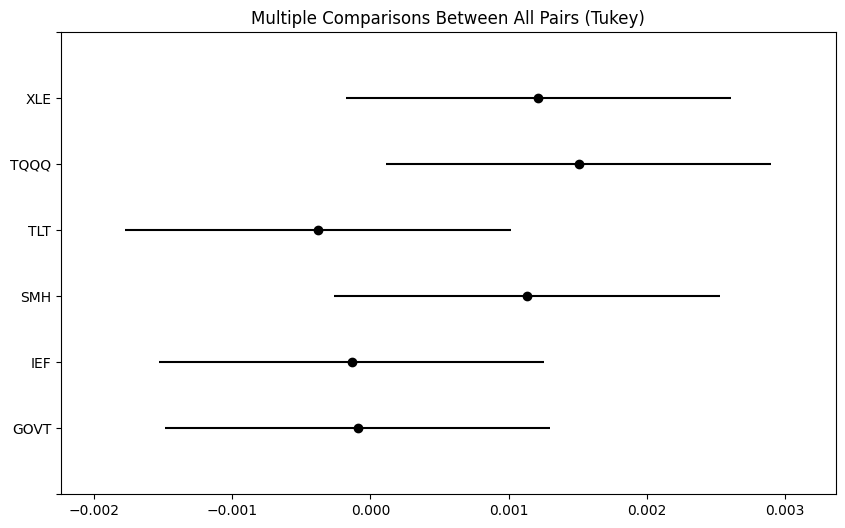

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
tukey.plot_simultaneous(ax=ax);

# 9) Conclusão

Este trabalho visou explorar técnicas de multicomparação estatística na correção de valores de probabilidade dos retornos de 98 fundos. Foram utilizados os testes T, Bonferroni, Holm e paridade de Tukey.

O teste de hipótese da média do retorno dos 98 fundos apresentou um pvalor de teste T < 0.05 para 12 fundos, indicando aceitar a hipótese alternativa e portanto a afirmação de que há diferença significativa entre as médias dos fundos.

Foram aplicados os testes de Bonferroni e Holm para a correção da significância, e ambos trouxeram os mesmos 4 (BIL, JPST, SGOV, SHV) fundos apresentando diferença signficativa.

Todavia, esses fundos ocupavam as posições 74 a 77 numa ordem decrescente de retorno médio. São retornos baixos e portanto não significativos.

Alternativamente, decidimos testar a hipótese de diferença significativa de performance entre os fundos de maior (TQQQ) e menor (TLT) médias entre os 98. Novamente, o teste apresentou não significância ( ou seja pvalor > 0.05).

Por fim, utilizamos o teste de paridade de Tukey nesses 6 fundos (maior média = TQQQ, XLE, SMH e menor média = TLT, IEF, GOVT).

Todos os pvalores de correção ajustados aos pares indicaram aceitar a hipótese nula, trazendo mais evidência da não significância estatística para possível exploração das médias dos fundos para  arbitragem e pairs trading.





